# Stock Market Analysis

Welcome to your second data project! In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
4. What was the correlation between different stocks' daily returns?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior?


In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

In [3]:
import pandas_datareader as pdr
from pandas_datareader import data, wb

In [4]:
from datetime import datetime

In [5]:
# list of each tech stocks

tech_list = ['AAPL','FB','AMZN','GOOG']

In [6]:
# making the appropriate timeframe
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [7]:
# Quick ex of all the stocks

temp = pdr.get_data_yahoo('FB')
temp.reset_index(level=0, inplace=True) ## Changing the index value

temp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [11]:
for stock in tech_list:
    temp = pdr.get_data_yahoo(stock)
    temp.reset_index(level=0, inplace=True) ## Changing the index value
    
    globals()[stock] = temp[temp['Date'] >= start]


In [13]:
# Resetting all index 
AAPL.reset_index(inplace=True)
FB.reset_index(inplace=True)
AMZN.reset_index(inplace=True)
GOOG.reset_index(inplace=True)

In [14]:
# del the extra cols.
del AAPL['index']
del FB['index']
del AMZN['index']
del GOOG['index']

In [15]:
GOOG.head()

,level_0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2016-12-27,790.679993,797.859985,787.656982,791.549988,791.549988,789100
1,1,2016-12-28,793.700012,794.229980,783.200012,785.049988,785.049988,1153800
2,2,2016-12-29,783.330017,785.929993,778.919983,782.789978,782.789978,742200
3,3,2016-12-30,782.750000,782.780029,770.409973,771.820007,771.820007,1770000
4,4,2017-01-03,778.809998,789.630005,775.799988,786.140015,786.140015,1657300


In [16]:
GOOG.describe()

,level_0,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,126.000000,917.998259,923.746995,912.182693,918.604072,918.604072,1.471227e+06
std,73.179004,77.869181,79.062912,77.046601,78.057986,78.057986,6.411417e+05
min,0.000000,778.809998,782.780029,770.409973,771.820007,771.820007,2.335510e+05
25%,63.000000,833.849976,838.150024,829.036011,835.239990,835.239990,1.088700e+06
50%,126.000000,929.059998,933.440002,923.030029,928.799988,928.799988,1.287600e+06
75%,189.000000,970.000000,976.090027,963.359985,971.469971,971.469971,1.640200e+06
max,252.000000,1075.199951,1078.489990,1063.550049,1077.140015,1077.140015,5.167700e+06


In [17]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 8 columns):
level_0      253 non-null int64
Date         253 non-null datetime64[ns]
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Adj Close    253 non-null float64
Volume       253 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 15.9 KB


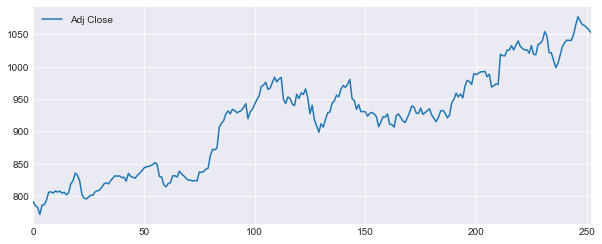

In [18]:
GOOG['Adj Close'].plot(legend=True,figsize = (10,4))

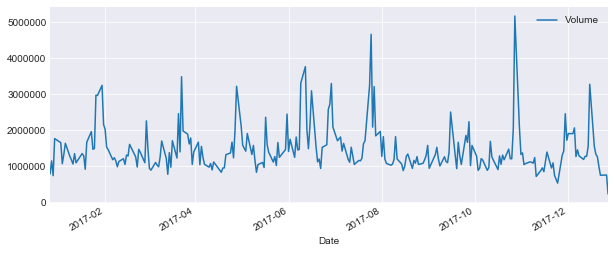

In [19]:
GOOG.plot(y="Volume",x="Date",legend=True,figsize = (10,4))

### Info on moving averages
http://www.investopedia.com/terms/m/movingaverage.asp

http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [20]:
ma_day = [10,20,50]

for ma in ma_day:
    colname = "MA for {0} days".format(ma)
    
    # For the AAPL STOCK
    AAPL[colname] = AAPL['Adj Close'].rolling(window=ma).mean()

In [21]:
AAPL.head(10)

,level_0,Date,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days
0,0,2016-12-27,116.519997,117.800003,116.489998,117.260002,115.404190,18296900,NaN,NaN,NaN
1,1,2016-12-28,117.519997,118.019997,116.199997,116.760002,114.912109,20905900,NaN,NaN,NaN
2,2,2016-12-29,116.449997,117.110001,116.400002,116.730003,114.882584,15039500,NaN,NaN,NaN
3,3,2016-12-30,116.650002,117.199997,115.430000,115.820000,113.986984,30586300,NaN,NaN,NaN
4,4,2017-01-03,115.800003,116.330002,114.760002,116.150002,114.311760,28781900,NaN,NaN,NaN
5,5,2017-01-04,115.849998,116.510002,115.750000,116.019997,114.183815,21118100,NaN,NaN,NaN
6,6,2017-01-05,115.919998,116.860001,115.809998,116.610001,114.764473,22193600,NaN,NaN,NaN
7,7,2017-01-06,116.779999,118.160004,116.470001,117.910004,116.043915,31751900,NaN,NaN,NaN
8,8,2017-01-09,117.949997,119.430000,117.940002,118.989998,117.106812,33561900,NaN,NaN,NaN
9,9,2017-01-10,118.769997,119.379997,118.300003,119.110001,117.224907,24462100,115.282155,NaN,NaN


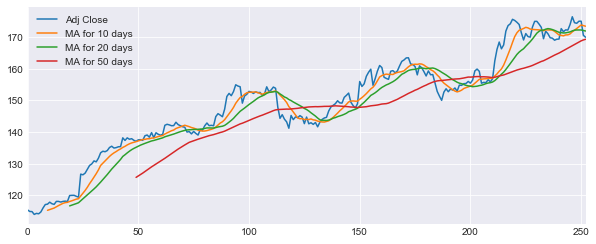

In [22]:
AAPL[["Adj Close", "MA for 10 days","MA for 20 days","MA for 50 days"]].plot(subplots=False, figsize = (10,4))
plt.show()

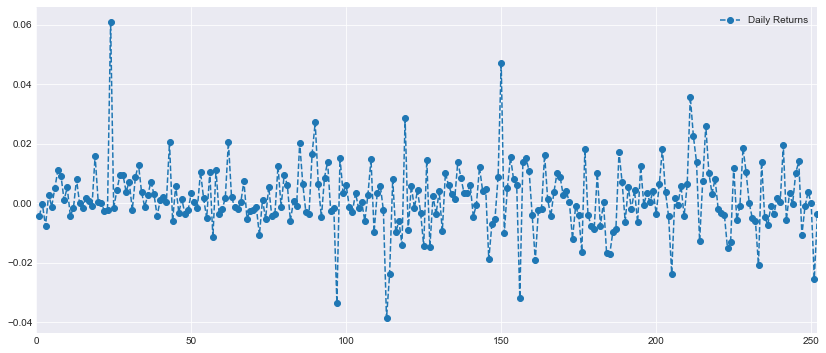

In [23]:
AAPL['Daily Returns'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Returns'].plot(figsize=(14,6), legend=True, linestyle='--', marker='o')
plt.show()

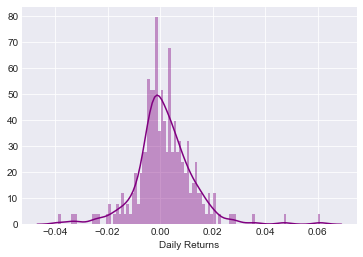

In [24]:
sns.distplot(AAPL['Daily Returns'].dropna(), bins=100, color='purple')
plt.show()

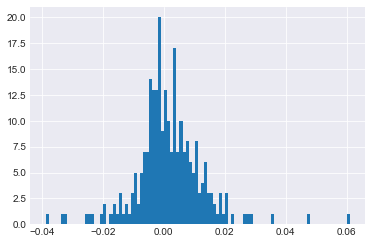

In [25]:
AAPL['Daily Returns'].hist(bins=100)

In [26]:
AAPL.head()

,level_0,Date,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Returns
0,0,2016-12-27,116.519997,117.800003,116.489998,117.260002,115.404190,18296900,NaN,NaN,NaN,NaN
1,1,2016-12-28,117.519997,118.019997,116.199997,116.760002,114.912109,20905900,NaN,NaN,NaN,-0.004264
2,2,2016-12-29,116.449997,117.110001,116.400002,116.730003,114.882584,15039500,NaN,NaN,NaN,-0.000257
3,3,2016-12-30,116.650002,117.199997,115.430000,115.820000,113.986984,30586300,NaN,NaN,NaN,-0.007796
4,4,2017-01-03,115.800003,116.330002,114.760002,116.150002,114.311760,28781900,NaN,NaN,NaN,0.002849


In [27]:
AAPL['Adj Close'].head()

0    115.404190
1    114.912109
2    114.882584
3    113.986984
4    114.311760
Name: Adj Close, dtype: float64

In [28]:
GOOG['Adj Close'].head()

0    791.549988
1    785.049988
2    782.789978
3    771.820007
4    786.140015
Name: Adj Close, dtype: float64

In [29]:
FB['Adj Close'].head()

0    118.010002
1    116.919998
2    116.349998
3    115.050003
4    116.860001
Name: Adj Close, dtype: float64

In [30]:
#closing_df = pdr(tech_list, 'yahoo', start, end)['Adj Close']
closing_df = DataFrame({
    "AAPL": AAPL['Adj Close'],
    "GOOG": GOOG['Adj Close'],
    "FB": FB['Adj Close'],
    "AMZN": AMZN['Adj Close']
    
})
closing_df.head()


,AAPL,AMZN,FB,GOOG
0,115.404190,771.400024,118.010002,791.549988
1,114.912109,772.130005,116.919998,785.049988
2,114.882584,765.150024,116.349998,782.789978
3,113.986984,749.869995,115.050003,771.820007
4,114.311760,753.669983,116.860001,786.140015


In [31]:
big4_returns = closing_df.pct_change()

big4_returns.drop(big4_returns.index[0], inplace=True)

In [33]:
big4_returns.head()


,AAPL,AMZN,FB,GOOG
1,-0.004264,0.000946,-0.009237,-0.008212
2,-0.000257,-0.009040,-0.004875,-0.002879
3,-0.007796,-0.019970,-0.011173,-0.014014
4,0.002849,0.005068,0.015732,0.018554
5,-0.001119,0.004657,0.015660,0.000967


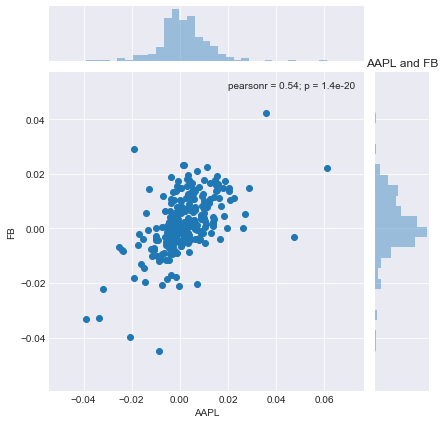

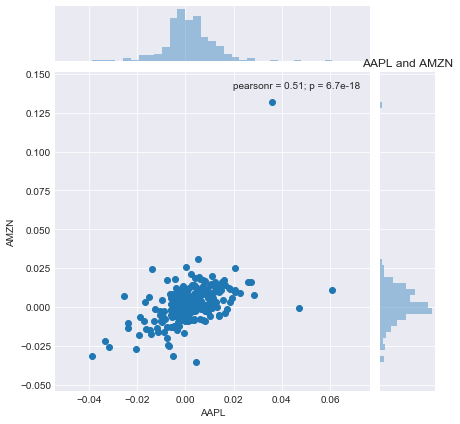

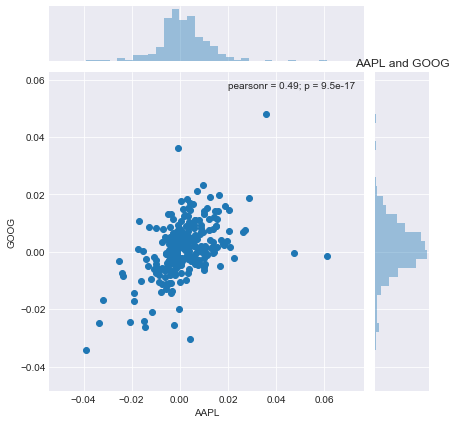

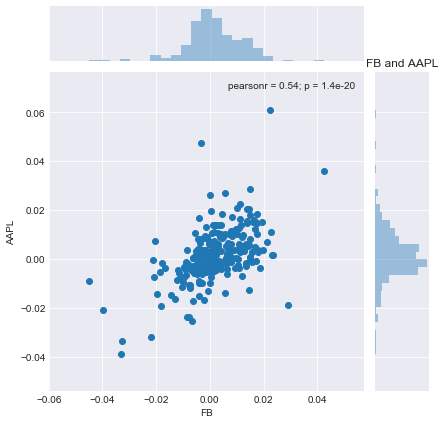

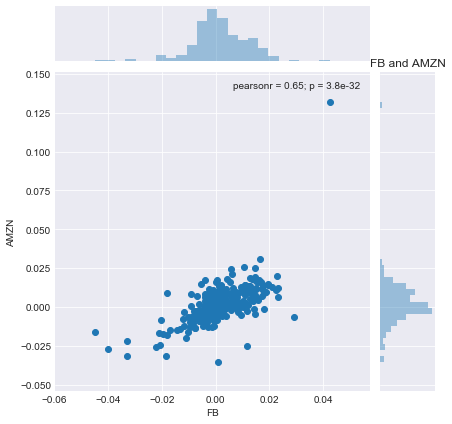

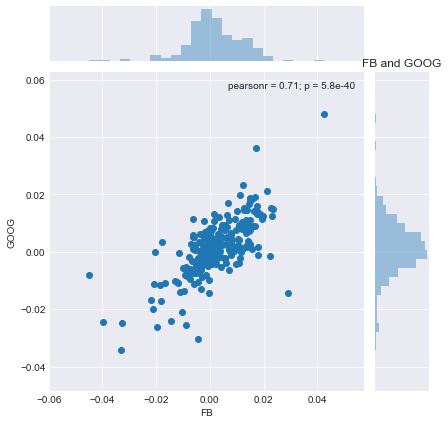

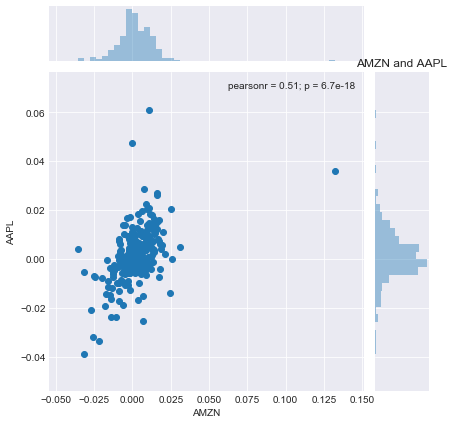

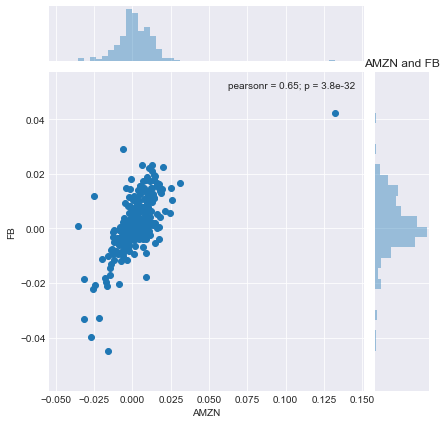

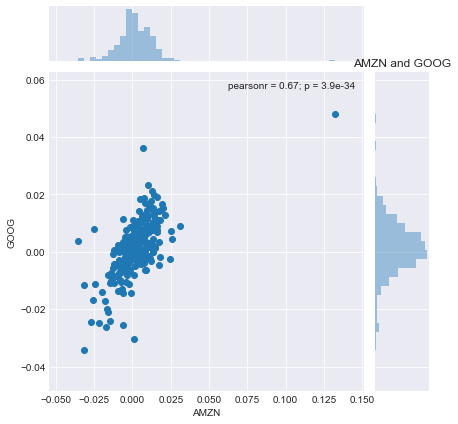

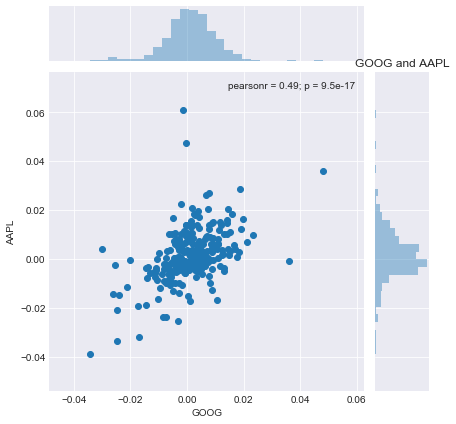

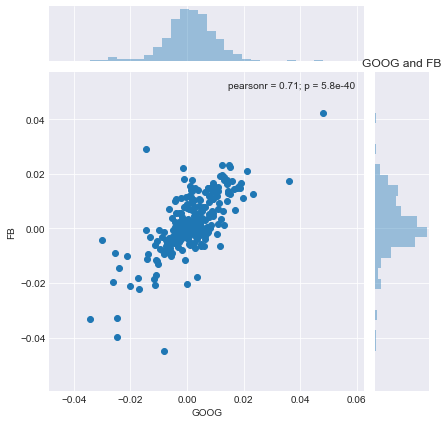

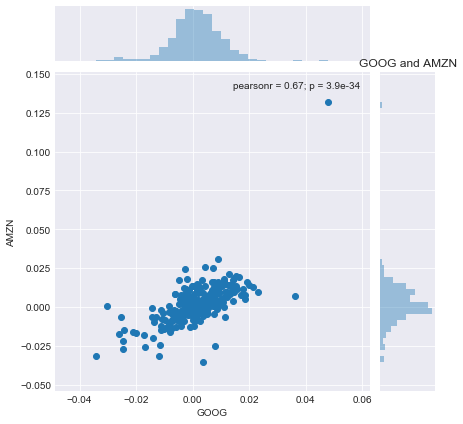

In [34]:
for x in tech_list:
    for y in tech_list:
        if x != y:
            sns.jointplot(x, y, big4_returns)
            plt.title(('{0} and {1}').format(x,y)) # Various CI
            plt.show()


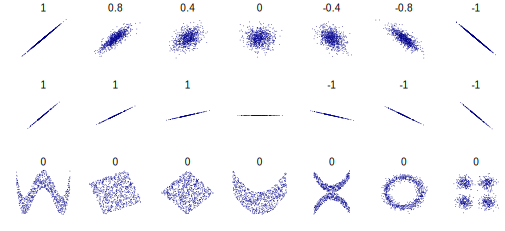

In [36]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

In [37]:
big4_returns.head()

,AAPL,AMZN,FB,GOOG
1,-0.004264,0.000946,-0.009237,-0.008212
2,-0.000257,-0.009040,-0.004875,-0.002879
3,-0.007796,-0.019970,-0.011173,-0.014014
4,0.002849,0.005068,0.015732,0.018554
5,-0.001119,0.004657,0.015660,0.000967


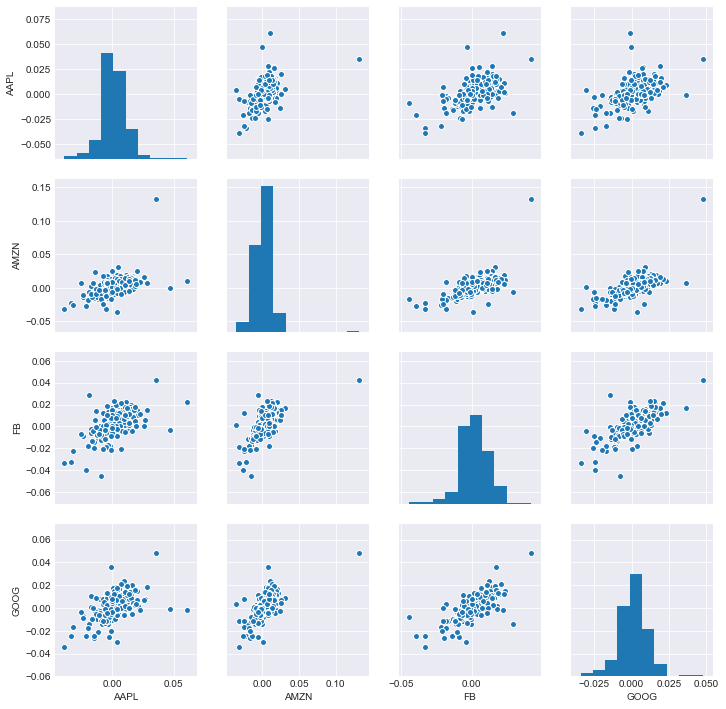

In [38]:
# Pairplot
sns.pairplot(big4_returns.dropna())

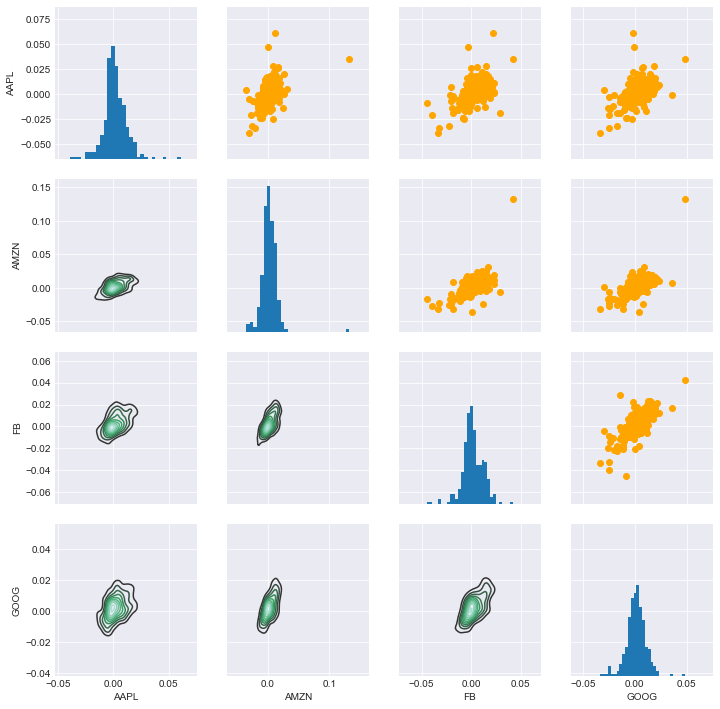

In [39]:
# create our pairplot

returns_fig = sns.PairGrid(big4_returns.dropna())

returns_fig.map_upper(plt.scatter,color='orange')
returns_fig.map_lower(sns.kdeplot,cmpa='cool_d')
returns_fig.map_diag(plt.hist,bins=30)
plt.show()

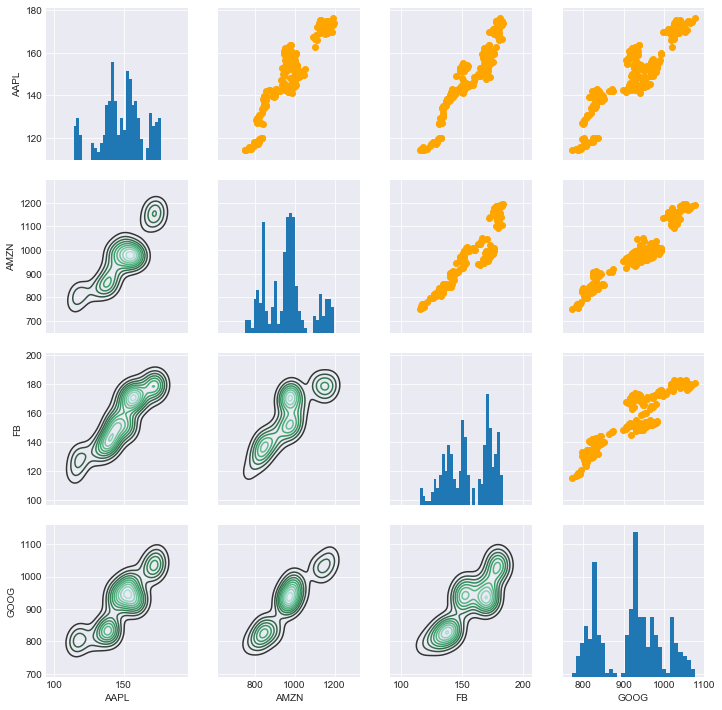

In [40]:
# create our pairplot

returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='orange')
returns_fig.map_lower(sns.kdeplot,cmpa='cool_d')
returns_fig.map_diag(plt.hist,bins=30)
plt.show()

In [41]:
big4_returns.corr()

,AAPL,AMZN,FB,GOOG
AAPL,1.000000,0.507484,0.541242,0.491725
AMZN,0.507484,1.000000,0.654060,0.669558
FB,0.541242,0.654060,1.000000,0.710075
GOOG,0.491725,0.669558,0.710075,1.000000


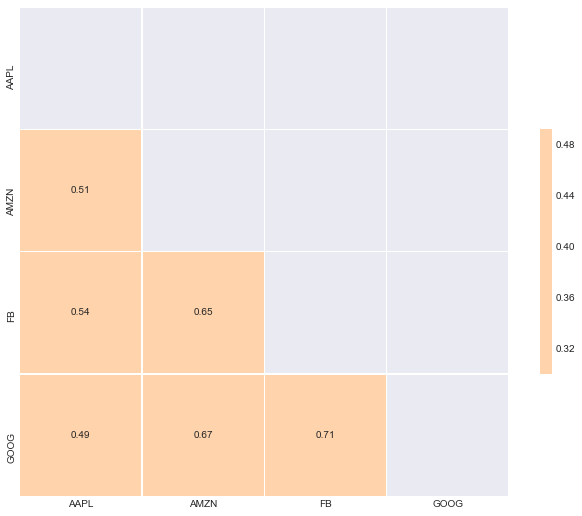

In [42]:
# Compute the correlation matrix
corr = big4_returns.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

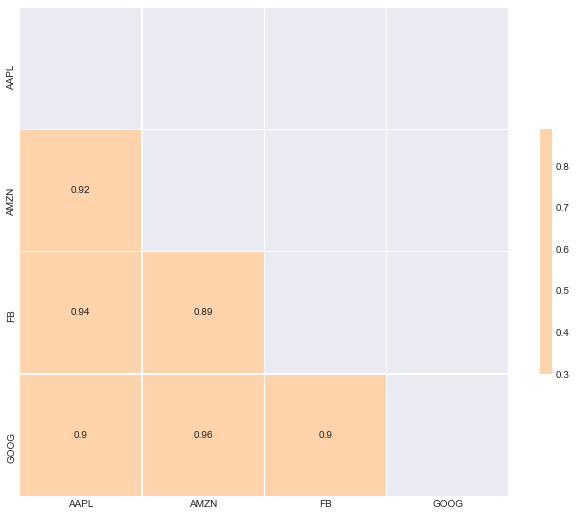

In [43]:
# Compute the correlation matrix
corr = closing_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Risk Analysis

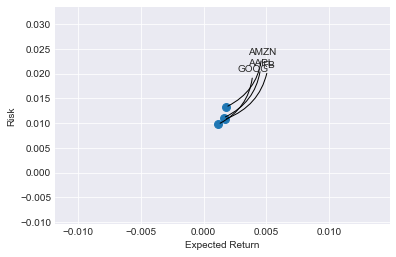

In [44]:
rets = big4_returns.dropna()
area = np.pi * 20
plt.scatter(x=rets.mean(), y=rets.std(), s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


## Value at Risk
We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

## Value at risk using the "bootstrap" method

For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

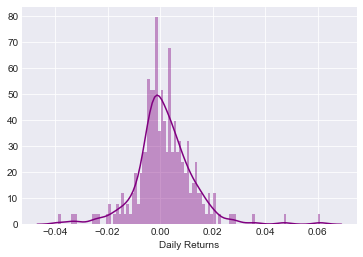

In [45]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Returns'].dropna(),bins=100,color='purple')

In [46]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.014911698036799348

** The 0.05 empirical quantile of daily returns is at -0.014. That means that with 95% confidence, our worst daily loss will not exceed 1.4%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.014 * 1,000,000 = $14,000.**

In [47]:
from collections import defaultdict

# Let perform for all of them with differernt ranges
ranges = [0.025, 0.05, 0.1]
var_d = defaultdict(list)


for t_stock in tech_list:
    for val in ranges:
        ret = rets[t_stock].quantile(val)
        var_d[t_stock].append(ret)
var_d

defaultdict(list,
            {'AAPL': [-0.020318352248894993,
              -0.014911698036799348,
              -0.009723390341416636],
             'AMZN': [-0.023780200527053923,
              -0.016047040286441987,
              -0.010369152275866923],
             'FB': [-0.02066069191606408,
              -0.01549650704753944,
              -0.009057361773952643],
             'GOOG': [-0.02331393054836877,
              -0.014216932674003074,
              -0.009424634869679437]})

In [48]:
df_VaR = DataFrame(var_d)
df_VaR

,AAPL,AMZN,FB,GOOG
0,-0.020318,-0.023780,-0.020661,-0.023314
1,-0.014912,-0.016047,-0.015497,-0.014217
2,-0.009723,-0.010369,-0.009057,-0.009425


## Efficient Market Hypothesis

- The three versions of the efficient market hypothesis are varying degrees of the same basic theory. The weak form suggests that today’s stock prices reflect all the data of past prices and that no form of technical analysis can be effectively utilized to aid investors in making trading decisions. Advocates for the weak form efficiency theory allow that if fundamental analysis is used, undervalued and overvalued stocks can be determined, and investors can research companies' financial statements to increase their chances of making higher-than-market-average profits.

- The semi-strong form efficiency theory follows the belief that because all information that is public is used in the calculation of a stock's current price, investors cannot utilize either technical or fundamental analysis to gain higher returns in the market. Those who subscribe to this version of the theory believe that only information that is not readily available to the public can help investors boost their returns to a performance level above that of the general market. Inside trading.

- The strong form version of the efficient market hypothesis states that all information – both the information available to the public and any information not publicly known – is completely accounted for in current stock prices, and there is no type of information that can give an investor an advantage on the market. Advocates for this degree of the theory suggest that investors cannot make returns on investments that exceed normal market returns, regardless of information retrieved or research conducted.

- https://www.investopedia.com/ask/answers/032615/what-are-differences-between-weak-strong-and-semistrong-versions-efficient-market-hypothesis.asp#ixzz52OLUr7S1 


## Value at Risk using the Monte Carlo method
- Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

**DRIFT**: Expected Periodic Daily Rate of Return (the rate with the greatest odds of returning)

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:
<img src="Monte_Carlo_1.png">

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.
<img src="Monte_Carlo_2.png">
- The first term is known as "drift", which is the average daily return multiplied by the change of time. 
- The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. 


**By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.**


For more info on the Monte Carlo method for stocks, check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

In [49]:
big4_returns.head()

,AAPL,AMZN,FB,GOOG
1,-0.004264,0.000946,-0.009237,-0.008212
2,-0.000257,-0.009040,-0.004875,-0.002879
3,-0.007796,-0.019970,-0.011173,-0.014014
4,0.002849,0.005068,0.015732,0.018554
5,-0.001119,0.004657,0.015660,0.000967


In [50]:
# Setting time horizon

days = 365
dt = 1/days

In [63]:
rets.head()

,AAPL,AMZN,FB,GOOG
1,-0.004264,0.000946,-0.009237,-0.008212
2,-0.000257,-0.009040,-0.004875,-0.002879
3,-0.007796,-0.019970,-0.011173,-0.014014
4,0.002849,0.005068,0.015732,0.018554
5,-0.001119,0.004657,0.015660,0.000967


In [53]:
def stock_monte_carlo(*args):
    start_price, days, mu, sigma = args
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x] = price[x-1] +(price[x-1] * (drift[x] + shock[x]))
    
    return price

In [54]:
def get_metrics(tck, df):
    mu = df.mean()[tck]
    sigma = df.std()[tck]
    return(mu, sigma, tck)
    

In [55]:
def run_simulations(*args):
    days = 365
    start_price, mu, sigma = args
    
    runs = 10000
    simulation = np.zeros(runs)

    for run in range(runs):
        simulation[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1] # do not know why days-1
    return simulation

In [56]:

def plot_histogram(*args):
    simulation, start_price, tck = args
    
    q = np.percentile(simulation,1)
    plt.hist(simulation, 150)

    plt.figtext(0.62,0.8, s="Start Price: {0:.2f}".format(start_price))

    # Mean
    plt.figtext(0.62,0.7, s="Mean final price: {0:.2f}".format(simulation.mean()))

    # Variance
    plt.figtext(0.62,0.6, s="VaR(0.99): {0:.2f}".format(start_price-q))

    # Display 1 Percent Quantile
    plt.figtext(0.13,0.6,"q(0.99): {0:.2f}".format(q))

    # Plot a line at the 1% quantile result
    plt.axvline(x=q, linewidth=4, color='r')

    plt.title("Final price distribution for {0} Stock after 365 days".format(tck))



In [57]:
def create_monte_chart(*args):
    start_price = args[0]
    mu, sigma, tck = args[1]
    days = 365
        
    for run in range(100):
        plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

    plt.xlabel("Days")
    plt.ylabel("Price")
    plt.title("Analysis for {0}".format(tck))
    plt.show()
    plt.close()
    

** The Mean Final price is close to the starting price because the expected return is close to 0. The VaR means that if we run this simulation after many times, we will encounter a lost of 2.63. This is NOT a big loss (indicated by the red line) **

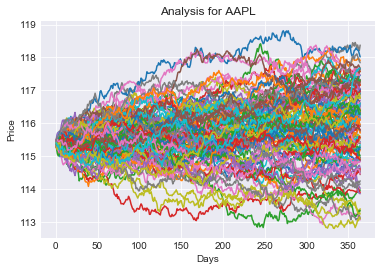

In [58]:
start_price = AAPL['Adj Close'][0]
create_monte_chart(start_price, get_metrics('AAPL', rets))

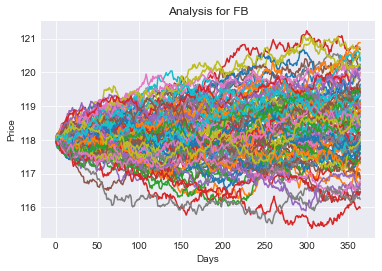

In [59]:
start_price = FB['Adj Close'][0]
create_monte_chart(start_price, get_metrics('FB', rets))


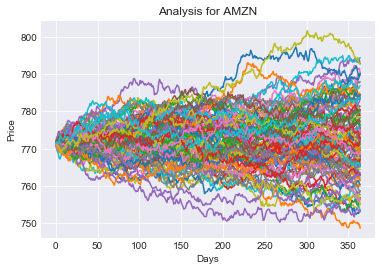

In [60]:
start_price = AMZN['Adj Close'][0]
create_monte_chart(start_price, get_metrics('AMZN', rets))


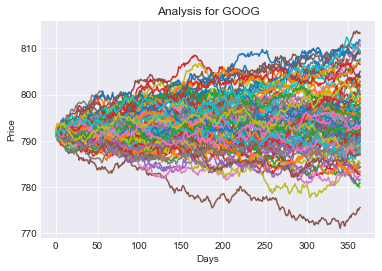

In [61]:
start_price = GOOG['Adj Close'][0]
create_monte_chart(start_price, get_metrics('GOOG', rets))


In [64]:
rets.head()

,AAPL,AMZN,FB,GOOG
1,-0.004264,0.000946,-0.009237,-0.008212
2,-0.000257,-0.009040,-0.004875,-0.002879
3,-0.007796,-0.019970,-0.011173,-0.014014
4,0.002849,0.005068,0.015732,0.018554
5,-0.001119,0.004657,0.015660,0.000967


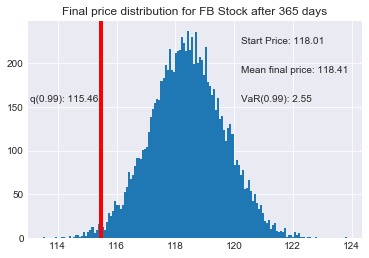

In [65]:
start_price = FB['Adj Close'][0]

mu, sigma, tck = get_metrics('FB', rets)

simulations = run_simulations(start_price, mu, sigma)
plot_histogram(simulations, start_price, tck)

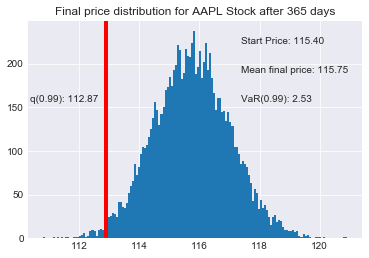

In [66]:
start_price = AAPL['Adj Close'][0]

mu, sigma, tck = get_metrics('AAPL', rets)

simulations = run_simulations(start_price, mu, sigma)
plot_histogram(simulations, start_price, tck)

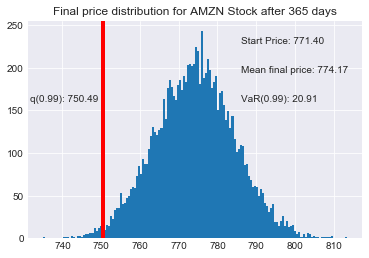

In [67]:
start_price = AMZN['Adj Close'][0]

mu, sigma, tck = get_metrics('AMZN', rets)

simulations = run_simulations(start_price, mu, sigma)
plot_histogram(simulations, start_price, tck)

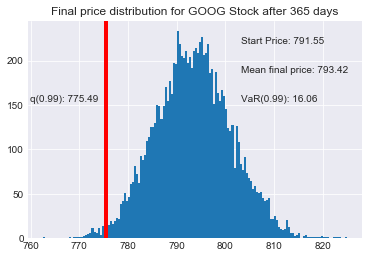

In [68]:
start_price = GOOG['Adj Close'][0]

mu, sigma, tck = get_metrics('GOOG', big4_returns)

simulations = run_simulations(start_price, mu, sigma)
plot_histogram(simulations, start_price, tck)